# Analysis of Undergraduate Retention Rates at 4-Year Universities

## A6.  Final Project Report




**Samir D. Patel**

**DATA 512 - Human Centered Data Science**

**University of Washington**


### Introduction

College selection can often be an overwhelming and stressful process for high school graduates in the United States. Every year, tens of millions of prospective students must weigh several selection factors such as tuition cost, proximity, program reputation, and future success indicators such as average salary upon graduation.  The decision of selecting the right institution could result in greater chances of personal and financial success in the future.

While popular annual college rankings, such as those published by the U.S. News and World Report, are thought as a useful guide for some students and parents, to others they provide only a one-size fits all solution for students.  More specifically, their goal is to match elite students to elite universities. But for the average prospective college student, are these published rankings helpful? Given the number of options for collegial study in the country, students may want to hone in on options for colleges that fit them best and maximize their chances of success, with decisions based on their socio-economic background, geographic location, interests, and aptitude. Achieving this requires taking into account factors such as each applicant’s background, qualities, needs, and aspirations that can better predict the chances of success.

### Goals and Motivations in Respect to Human-Centered Data Science

The goal of this research will be to perform an analysis focused on one particular success indicator for students: retention rate.  Many indicators in university ranking publications focus on commonly known metrics such as ranking by program, tuition costs, and admissions criteria (SAT score, GPA).  But for many students, knowing likelihood of being able to attend and sustain enrollment in school may be the superior indicator. 

By working through a research question and analysis based on retention rate, the motivation of this work is to evaluate alternative success metrics in an effort to understand optimal conditions for the average student's success at a university.   This can hopefully be built upon and become useful for those helping students and parents in the decision process (e.g. academic counselors, policymakers and university admissions officials).

### Background (or Related Work)

#### Existing Evidence/Literature study:

Retention rate, also commonly referred to as persistence, is the percentage of first-time, first-year undergraduate enrollees that will continue at the institution the following academic year [1].  With growing focus on persistence and graduation rates, the effects of financial aid (loans, grants) are being revisited by policymakers, interested in assessing the effectiveness of these tools [2].  

The New York Times' data-journalism site, "The Upshot" recently saw in 2015 that the University of California public school system led the United States in enrolling high-performing students of all economic backgrounds [3].  The three factors used in the "College Access Index" to determine performance of these institutions were the percentage of students receiving Pell Grants, graduate rates of those students, and the net costs of attending college. Given the general importance that tuition costs play into decisions for prospective students, the impacts of financial aid (both in the forms of loans and grants) on student retention would make for an interesting research question to assess if outcomes are consistently positive across a larger sample size of institutions.

Locale of an academic institution is a factor that deserves consideration in respect to a student's retention.  In February of 2017, an article in the Times Higher Education University Rankings discussed a study which looked at physical campus characteristics and the resulting impacts on student satisfaction and performance [4]. The specific physical qualities of campuses included campus size, urban score and living score.  The results of the research showed that the 5 universities with the best physical scores had higher student retention and graduation rates. This assessment of urban vs. rural characteristics makes for another potentially interesting research question given the breadth of the College Score data set.

### Data Set


The U.S. Department of Education’s Office of Planning, Evaluation and Policy Development provides an open dataset, [“College Scorecard”](https://collegescorecard.ed.gov/data/documentation/), that appears rich enough to assess student success in terms of retention rate.  The abstract introducing this data set details the U.S. Department of Education's goal of making it “easier for students to search for a college that is a good fit for them” [5]. The raw data set contains data on each accredited university offering an undergraduate program in the U.S.  For each university, the data acquired includes a number of the features, many of which are the norm with college data sets (e.g. university location, admissions rate, tuition cost, SAT/ACT score percentiles).

As mentioned, the primary parameter of interest in this study is the retention rate for an institution, which is separately recorded in the College Scorecard data by full-time/part-time status along with degree type (2-year vs 4-year). Other interesting features in the data set which can be leveraged for additional insights, include percent of students receiving federal loans, average/median loan debt amounts, and estimated earnings post-graduation.

In total, the data set for the 2015-16 academic year has 1,777 columns in total and 7,593 observations (each representing an institution).  In addition, the data is also available for years dating all the way back to 1996-1997.  

**Limitations**:  It is important to note, there is considerable sparsity in the data set, as assessed in the data importation and cleaning steps seen later in the notebook.  This renders many columns as unusable but since we are not interested in modeling at this stage, only exploratory and research analysis, hopefully there should be enough data for interesting insights.

Given the huge amount of data features, it will be beyond my bandwidth go into details on summarizing each and every one's meaning and data type. But for the reader's own reference if interested, the data dictionary provided by the “College Scorecard” contains all of this information and can be found below:

https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary.xlsx

### Research Questions and Hypotheses:

Using the College Scorecard data set, we will look to leverage its data on institution statistics for the 2015-16 year in efforts to evaluate various hypotheses formed around the question of retention rate.

#### Motivating Research Question

What conditions affect student retention at universities offering 4-year undergraduate degrees?

#### Hypotheses:

- **H1:  Public institutions in the U.S. have the highest student retention.**


- **H2:  Institutions with remote/rural locales result in higher student retention.**


- **H3:  Institutions providing higher percentages of financial aid are more likely to see higher retention.**


### Methods

The methods in this research will start by taking the College Scorecard data and in respect to the motivating reserach question and hypotheses, and performing any necessary data cleaning in order to work with the data.

The data set will be curated and processed using the programming language Python, which can handle the large the sizes of the datasets.  The data cleaning process will be aided by commonly used packages such as pandas and numpy.

After these steps, the data will first be investigated, using exploratory data analysis within Python to help identify any patterns and validate any assumptions while also helping understand the data set fundamentally. 

In turn, this will lend itself as helpful towards the research analysis portion, where we can assess validity of the formed hypotheses.  If limitations arise or the nature of the data requires specific curation techniques or considerations, this is the step that will allow for any iterations and/or adjustments to the research design.

Both the exploratory and research analyses will involve continued use of the pandas and numpy packages, as well as matplotlib and seaborn for data visualization.

#### Importing relevant packages
    - pandas:  A package used for data structuring and analysis.
    - numpy:  A package used for scientific computing and advanced mathematical functionalities.
    - matplotlib: A plotting library built for Python.
    - seaborn: A visualization library built on top of matplotlib for more detailed graphics.
 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

As mentioned, the College Scorecard data being used in this analysis is from the 2015-16 academic year.  This particular year's data set file (CSV) is accessible through my [Github Repository](https://github.com/samirpdx/data-512-final-project/blob/master/sample%20data/MERGED2015_16_PP.csv) or one can visit the [College Scorecard Website](https://collegescorecard.ed.gov/data/) for the full zip file containing all years of data.   If more specific subset of data is desired, the latter link also details the API where smaller subsets can be accessed through calls to the API endpoint.  However, for the purpose of being able to work with the entire data set, it is much easier to download the CSV for now.

Once the CSV data has been locally downloaded, we will read in the data into a Pandas DataFrame object. 

In [149]:
data = pd.read_csv("./sample data/MERGED2015_16_PP.csv", low_memory = False)
data = data.replace('PrivacySuppressed',np.NaN)

Several values in the data set are labeled as "Privacy Suppressed".  To keep NA labeling consistent, we will convert these values to NaN

In [150]:
data = data.replace('PrivacySuppressed',np.NaN)

To understand the number of observations and dimensions, let's look at the shape.

In [151]:
data.shape

(7593, 1777)

The data set has 7,593 observations (a row representing data for a single institution) and 1,777 features/predictors.

Below, we get our first glance at how the data looks by printing the first 5 rows :

In [323]:
data.head(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_L4_WHITENH,D150_L4_BLACKNH,D150_L4_API,D150_L4_AIANOLD,D150_L4_HISPOLD,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,NaN,NaN,NaN,NaN,NaN,4210.0,2.0,NaN,1123.0,SACSCC
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,NaN,NaN,NaN,NaN,NaN,11679.0,2.0,242.0,6822.0,SACSCC
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,NaN,NaN,279.0,1.0,NaN,319.0,SACSCC
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,NaN,NaN,NaN,NaN,5618.0,2.0,184.0,1853.0,SACSCC
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,NaN,NaN,NaN,NaN,4805.0,2.0,24.0,619.0,SACSCC


To assess the sparsity, we will count the NA values:

In [14]:
nulls = data.isnull().sum().sum()

In [13]:
total = data.shape[0]*data.shape[1]

In [15]:
nulls/total

0.7506128656692281

We see that while the data set has potential breadth, 75% of potential values are missing.  This will be an important consideration in terms of assessing potential features available.

### Data Cleaning

Since we will be looking at institutions offering at a minimum, 4-year degree programs, we will filter the dataset using the "HIGHDEG" feature which corresponds to highest degrees awarded by an institution. 

In [22]:
temp = data[data["HIGHDEG"] >= 3]

Retention rate is the primary indicator we will be looking at and requires us to massage the data set, which contains 4 separate columns/features corresponding to retention.  To create a single column and feature out of these 4 columns, we will reshape the data using the "melt" function in Pandas.

In [23]:
# We will store the column names in a vector
subcols = ["RET_FT4", "RET_FTL4","RET_PT4", "RET_PTL4"]

We will make a list of all the columns in the data set and then remove 
those that are retention related.  This is because "melt" function requires 
an argument of ID variables (which will not be part of the reshaping process.)

In [24]:
keepcols = temp.columns
keepcols = keepcols.drop(subcols)
keepcols = pd.Series(keepcols)

Now we can execute the "melt" function for reshaping and rename values in the new column for clarity.

In [26]:
data1 = pd.melt(temp, id_vars = keepcols.values, value_vars=["RET_FT4","RET_PT4"], var_name="Retention Category", 
                value_name="Retention Rate")

In [27]:
# This step will rename the values in the new Retention Category column
data1['Retention Category'] = data1['Retention Category'].replace({'RET_FT4': 'Full Time 4-Year',
                                                                   'RET_PT4': 'Part Time 4-Year'})

Similarly, the following categories will require data type conversion and renaming of values to help create the visualizations.

- **DEP_STAT_PCT_IND**:  Percentage of students who are financially dependent and have family incomes between $0-30,000

- **INSTNM**:  Institution name

- **HIGHDEG**:  "Highest degree awarded

- **CONTROL**: Control of institution

- **LOCALE**: Degree of urbanization of institution

- **REGION**: Region


In [30]:
# Data Type Conversion
data1['DEP_STAT_PCT_IND'] = data1['DEP_STAT_PCT_IND'].astype('float64', 
                                                             copy = False)
data1['INSTNM'] = data1['INSTNM'].astype(str)
data1["HIGHDEG"] = data1["HIGHDEG"].astype(str)
data1['DEP_INC_PCT_LO'] = data1['DEP_INC_PCT_LO'].astype('float64', 
                                                         copy = False)

In [33]:
# Data value decoding (using DataDictionary from College Score)

data1['HIGHDEG'] = data1['HIGHDEG'].replace({'3': "Bachelor's", '4': 'Graduate'})

data1['CONTROL'] = data1['CONTROL'].replace({3: "Private For-Profit",
                                             2: "Private Non-Profit",
                                             1: "Public"})

data1['LOCALE'] = data1['LOCALE'].replace({11: "Large City", 
                                           12: "Mid-Size City", 
                                           13: "Small City", 
                                           21: "Large Suburb",
                                           22: "Mid-size Suburb",
                                           23: "Small Suburb",
                                           31: "Fringe Town",
                                           32: "Distant Town",
                                           33: "Remote Town",
                                           41: "Fringe Rural",
                                           42: "Distant Rural",
                                           43: "Remote Rural"
                                          })

# LOCALE also  needs to be ordinal
data1['LOCALE'] = pd.Categorical(data1['LOCALE'], 
                      categories=["Large City", 
                                  "Mid-Size City", 
                                  "Small City", 
                                  "Large Suburb",
                                  "Mid-size Suburb",
                                  "Small Suburb",
                                  "Fringe Town",
                                  "Distant Town",
                                  "Remote Town",
                                  "Fringe Rural",
                                  "Distant Rural",
                                  "Remote Rural"],
                                 ordered=True)


data1['REGION'] = data1['REGION'].replace({0: "U.S. Service Schools", 
                                           1: "New England", 
                                           2: "Mid East", 
                                           3: "Great Lakes",
                                           4: "Plains",
                                           5: "Southeast",
                                           6: "Southwest",
                                           7: "Rocky Mtns",
                                           8: "Far West",
                                           9: "Outlying Areas",
                                          })

# REGION also needs to be ordinal
data1['REGION'] = pd.Categorical(data1['REGION'], 
                      categories=["U.S. Service Schools", 
                                           "New England", 
                                           "Mid East", 
                                           "Great Lakes",
                                           "Plains",
                                           "Southeast",
                                           "Southwest",
                                           "Rocky Mtns",
                                           "Far West",
                                           "Outlying Areas"],
                                 ordered=True)

### Exploratory Data Analysis

To understand the data set a bit more, particularly the features of interest, we will explore it.

A good place to start can be a correlation matrix;  however, given the very large number of features, we will insted look at the highest ranking Pearson correlation values relating to the Retention Variable.

####  Pearson Correlation

In [57]:
c = data.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

In [58]:
corrmat = pd.DataFrame(so, columns = ['corr'], index=None)

In [63]:
corr_rr = corrmat.loc['RET_FT4'].sort_values(by = 'corr', ascending = False)
corr_rr.head(20)

,corr
RET_FT4,1.000000
ACTCMMID,0.739619
SAT_AVG,0.739517
ACTCM25,0.738379
ACTENMID,0.736372
SATMTMID,0.735915
SATWR25,0.735109
SATWRMID,0.733369
ACTMTMID,0.732048
ACTEN25,0.728859


In ranking the top fields in respect to "4-year retention rate", we see the highest Pearson correlation rates pertain to SAT/ACT score features.

To understand Pearson values of the features relating to our hypotheses, we will search for some individually:

In [181]:
c = data.corr()

s = c.unstack()
so = s.sort_values(kind="quicksort")

In [182]:
corrmat = pd.DataFrame(so, columns = ['corr'], index=None)

In [183]:
#Pearson correlation in respect to Loan offerings of the instiution
corr_rr.loc['PCTFLOAN']

corr   -0.195991
Name: PCTFLOAN, dtype: float64

In [184]:
#Pearson correlation in respect to Pell Grant offerings of the instiution
corr_rr.loc['PCTPELL']

corr   -0.38473
Name: PCTPELL, dtype: float64

The coefficients when compared directly to the 4-year retention rate show moderate negative correlations for Loan and Pell Grant offerings.   In respect to pending research analysis on Loan and Grant offerings versus Retention Rate, we can keep these results in mind going forward.

While the REGION, LOCALE AND CONTROL variables were of interest to the research, because they are categorical in nature (and the data variable is also not setup as ordinal), we are not looking for their correlations.  

In a separate note, we will be careful in this reserach to remember not to assume correlation is causation.

#### Distributions 

Next, we will evaluate the distributions of data to get an idea of enrollment size and retention rates by variables of interest.

In [81]:
# Split data distributions as separate variables by institution type
target_0 = data1.loc[data1['CONTROL'] == 'Private For-Profit']
target_1 = data1.loc[data1['CONTROL'] == "Private Non-Profit"]
target_2 = data1.loc[data1['CONTROL'] == "Public"]

**_Distribution of Undergraduates Enrolled by Institution Type_**

C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


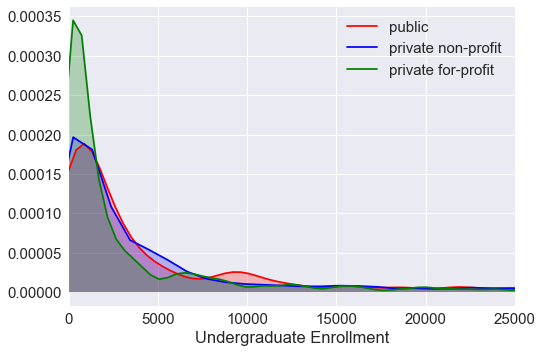

In [119]:
sns.set(font_scale=1.5)  # crazy big
ax = sns.kdeplot(target_2['UGDS'], color="red", shade=True, label="public")
ax = sns.kdeplot(target_1['UGDS'], color="blue", shade=True, label="private non-profit")
ax = sns.kdeplot(target_0['UGDS'], color="green", shade=True, label="private for-profit")
sns.plt.xlim(0, 25000)
ax.set_xlabel('Undergraduate Enrollment')
plt.show()

These results are interesting and show public universities have a bit of a wider enrollment distribution while private for-profit universities generally show lower enrollment numbers.

**_Distribution of Retention Rate by Institution Type_**

C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


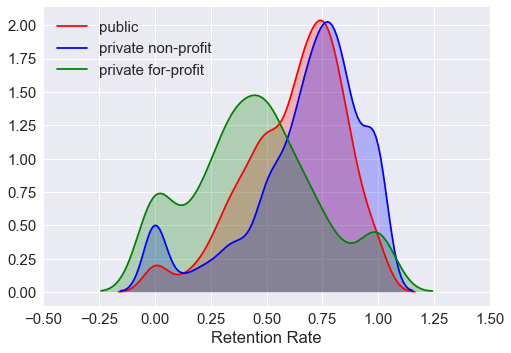

In [309]:
sns.set(font_scale=1.5)  # crazy big
ax = sns.kdeplot(target_2['Retention Rate'], color="red", shade=True, label="public")
ax = sns.kdeplot(target_1['Retention Rate'], color="blue", shade=True, label="private non-profit")
ax = sns.kdeplot(target_0['Retention Rate'], color="green", shade=True, label="private for-profit")
sns.plt.xlim(-0.5, 1.5)
ax.set_xlabel('Retention Rate')
plt.show()

When looking at retention rate distributions by institution type, we see the some similarities between private non-profit and public universities (particularly the similar modes), despite some slight enrollment differences. Private for-profit universities lag behind, with multiple modes.

Next, we will evaluate the distributions of data for enrollment size and retention rates by LOCALE.

In [82]:
# Sort the dataframe by target
target_0 = data1.loc[data1['LOCALE'] == 'Large City']
target_1 = data1.loc[data1['LOCALE'] == "Mid-Size City"]
target_2 = data1.loc[data1['LOCALE'] == "Small City"]
target_3 = data1.loc[data1['LOCALE'] == "Large Suburb"]
target_4 = data1.loc[data1['LOCALE'] == "Mid-size Suburb"]
target_5 = data1.loc[data1['LOCALE'] == "Small Suburb"]
target_6 = data1.loc[data1['LOCALE'] == "Fringe Town"]
target_7 = data1.loc[data1['LOCALE'] == "Distant Town"]
target_8 = data1.loc[data1['LOCALE'] == "Remote Town"]
target_9 = data1.loc[data1['LOCALE'] == "Fringe Rural"]
target_10 = data1.loc[data1['LOCALE'] == "Distant Rural"]
target_11 = data1.loc[data1['LOCALE'] == "Remote Rural"]

**_Distribution of Number of Undergraduates Enrolled by Locale (City)_**

C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


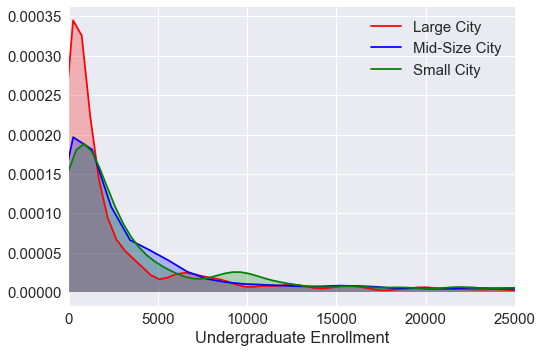

In [315]:
sns.set(font_scale=1.5)  # crazy big
ax = sns.kdeplot(target_0['UGDS'], color="red", shade=True, label="Large City")
ax = sns.kdeplot(target_1['UGDS'], color="blue", shade=True, label="Mid-Size City")
ax = sns.kdeplot(target_2['UGDS'], color="green", shade=True, label="Small City")
sns.plt.xlim(0, 25000)
ax.set_xlabel('Undergraduate Enrollment')
plt.show()

We see in the comparison of city locales for institutions, that there are far more large cities with universities with lower enrollment.  The distribution spread of universities with larger enrollments is seen with mid-size or small size cities.

**_Distribution of Number of Undergraduates Enrolled by Locale (Suburb)_**

C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


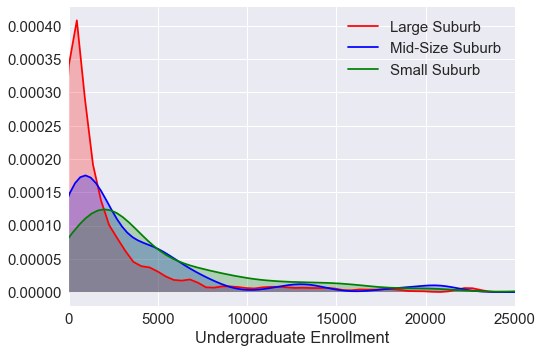

In [83]:
sns.set(font_scale=1.5)  # crazy big
ax = sns.kdeplot(target_3['UGDS'], color="red", shade=True, label="Large Suburb")
ax = sns.kdeplot(target_4['UGDS'], color="blue", shade=True, label="Mid-Size Suburb")
ax = sns.kdeplot(target_5['UGDS'], color="green", shade=True, label="Small Suburb")
sns.plt.xlim(0, 25000)
ax.set_xlabel('Undergraduate Enrollment')
plt.show()

For suburbs, again more institutions exist in large suburbs of lower end enrollment, while mid-size and smaller schools see wider distributions and more institutions at the higher enrollments.

**_Distribution of Number of Undergraduates Enrolled by Locale (Town/Rural)_**

C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


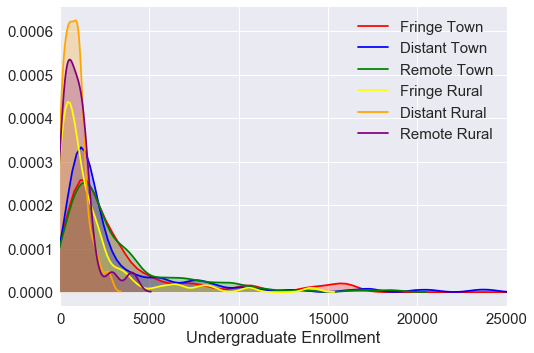

In [89]:
sns.set(font_scale=1.5)  # crazy big
ax = sns.kdeplot(target_6['UGDS'], color="red", shade=True, label="Fringe Town")
ax = sns.kdeplot(target_7['UGDS'], color="blue", shade=True, label="Distant Town")
ax = sns.kdeplot(target_8['UGDS'], color="green", shade=True, label="Remote Town")
ax = sns.kdeplot(target_9['UGDS'], color="yellow", shade=True, label="Fringe Rural")
ax = sns.kdeplot(target_10['UGDS'], color="orange", shade=True, label="Distant Rural")
ax = sns.kdeplot(target_11['UGDS'], color="purple", shade=True, label="Remote Rural")
sns.plt.xlim(0, 25000)
ax.set_xlabel('Undergraduate Enrollment')
plt.show()

The distributions here appear to show that as expected, many rural schools exist in the lower enrollment tiers with a shift seen for schools in towns.

**_Distribution of Retention Rate by Locale (City/Suburb)_**

C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


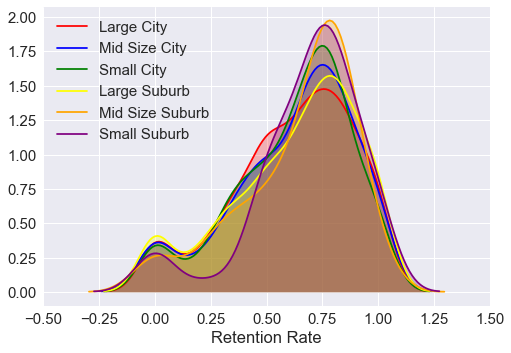

In [86]:
sns.set(font_scale=1.5)  # crazy big
ax = sns.kdeplot(target_0['Retention Rate'], color="red", shade=True, label="Large City")
ax = sns.kdeplot(target_1['Retention Rate'], color="blue", shade=True, label="Mid Size City")
ax = sns.kdeplot(target_2['Retention Rate'], color="green", shade=True, label="Small City")
ax = sns.kdeplot(target_3['Retention Rate'], color="yellow", shade=True, label="Large Suburb")
ax = sns.kdeplot(target_4['Retention Rate'], color="orange", shade=True, label="Mid Size Suburb")
ax = sns.kdeplot(target_5['Retention Rate'], color="purple", shade=True, label="Small Suburb")
sns.plt.xlim(-0.5, 1.5)
ax.set_xlabel('Retention Rate')
plt.show()

Viewing the distributions helps us assess frequency of institutions of particular retention rates, but we may need a different plot to extract more detail.

**_Distribution of Retention Rate by Locale (Town/Rural)_**

C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Samir\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


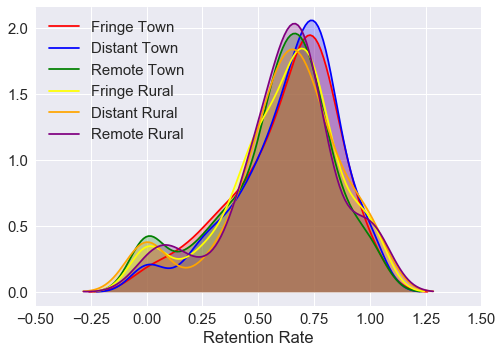

In [84]:
sns.set(font_scale=1.5)  # crazy big
ax = sns.kdeplot(target_6['Retention Rate'], color="red", shade=True, label="Fringe Town")
ax = sns.kdeplot(target_7['Retention Rate'], color="blue", shade=True, label="Distant Town")
ax = sns.kdeplot(target_8['Retention Rate'], color="green", shade=True, label="Remote Town")
ax = sns.kdeplot(target_9['Retention Rate'], color="yellow", shade=True, label="Fringe Rural")
ax = sns.kdeplot(target_10['Retention Rate'], color="orange", shade=True, label="Distant Rural")
ax = sns.kdeplot(target_11['Retention Rate'], color="purple", shade=True, label="Remote Rural")
sns.plt.xlim(-0.5, 1.5)
ax.set_xlabel('Retention Rate')
plt.show()

Again, viewing the distributions helps us assess frequency of institutions of particular retention rates, but we may need a different plot to extract more detail.

### Research Analysis 

To build on some of the high-level insights, we will try to assess the various parameters of interest in respect to retention rate in a multi-variate fashion to help us assess where effects are coming from.



#### Hypothesis H1:    _Public institutions in the U.S. have the highest student retention_

First we will look at retention rate in respect to the Retention Category (which tells us if a student is part-time or full-time) and split this assessment by the highest degree offered at the institution (a Bachelor's degree or Graduate degree)

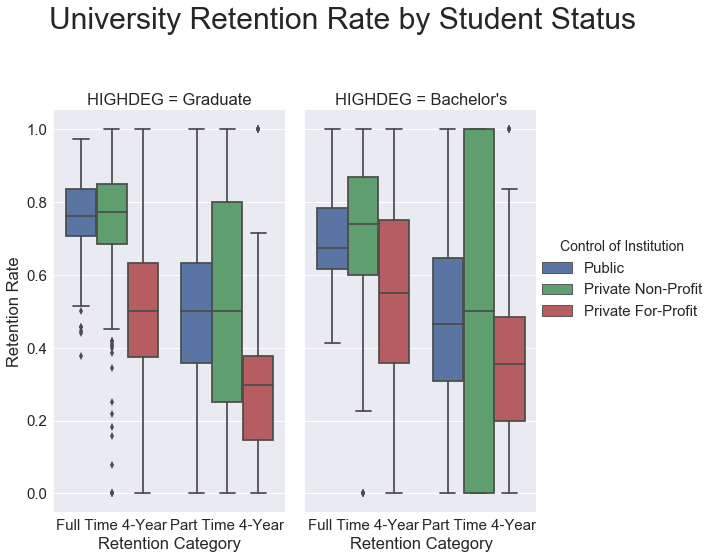

In [97]:
sns.set(font_scale=1.5)  # crazy big
g = sns.factorplot(x="Retention Category", y="Retention Rate",
                   hue="CONTROL",
                   col="HIGHDEG",
                   data=data1, kind="box",
                   size=8, aspect=0.5)

plt.subplots_adjust(top=0.8)
g.fig.suptitle('University Retention Rate by Student Status', size = 30)
g._legend.set_title("Control of Institution")
plt.savefig('./images/figure1.png')
plt.show()

#### Findings

We see in the results of the two sets of boxplots, that retention rate appears lowest consistently for part-time 4-year programs regardless of institution type or highest degree offering.  And across the board, private for-profit institutions have the lowest retention rate by each grouping.  

Hypothesis (H1) supposed that public institutions have the highest retention rate. Well, this does appear to be the case with the caveat that private non-profit institutions (despite lower enrollments as seen earlier) also share similar retention rates when broken out by highest degree offering and part-time/full-time comparisons.

#### Hypothesis H2: _Institutions with remote/rural locales result in higher student retention._
Next we will look at retention rate in respect to the locale (where the institution is located) and the Retention Category (which tells us if a student is part-time or full-time).

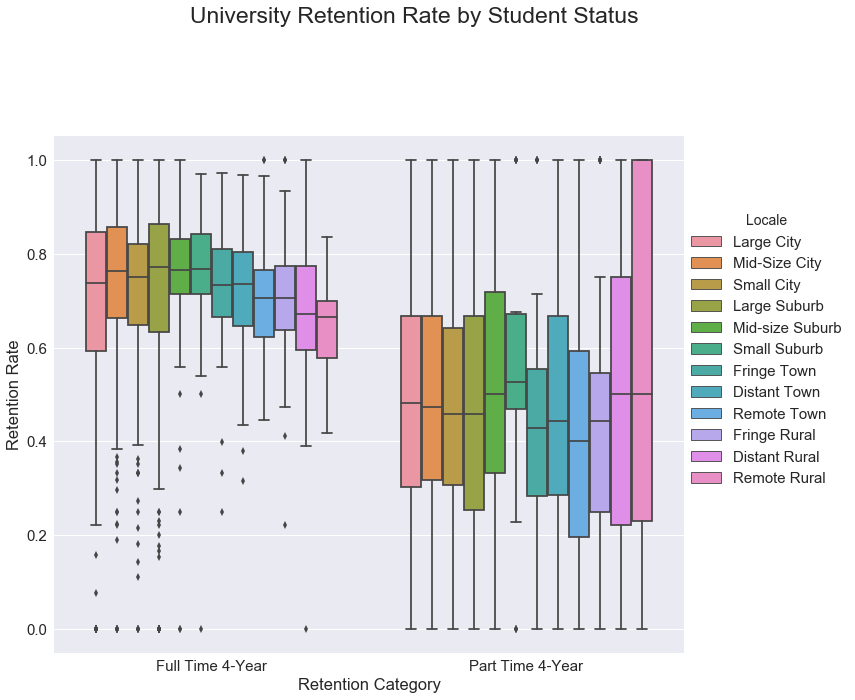

In [117]:
sns.set(font_scale=1.5)  # crazy big
g = sns.factorplot(x="Retention Category", y="Retention Rate",
                   hue="LOCALE",
#                    col="HIGHDEG",
                   data=data1, kind="box",
                   size=10, aspect=1)

plt.subplots_adjust(top=0.8)
g.fig.suptitle('University Retention Rate by Student Status', size = 23)
g._legend.set_title("Locale")
plt.savefig('./images/figure4.png')
plt.show()

#### Findings

In this plot, we see high variability for the Part-Time retention rate results at 4-year institutions, with locales showing similar medians.  However, the Full-Time retention rate data shows a steady decrease (showing a bit more detail than we could infer from the earlier distribution plots in the EDA).  As the locale becomes less urbanized and more rural/remote, the retention rate appears to drop.  This a a result that opposes the hypothesis, which suggested institutions with remote/rural locales would see higher retention rates.

#### Hypothesis (H3): _Institutions providing higher percentages of financial aid are more likely to see higher retention._

Lastly, we will look at the final hypothesis by assessing the relationship between retention rates and student loans and grants (each, respectively).  Again, we will break out the data and compare Full-Time and Part-Time results.

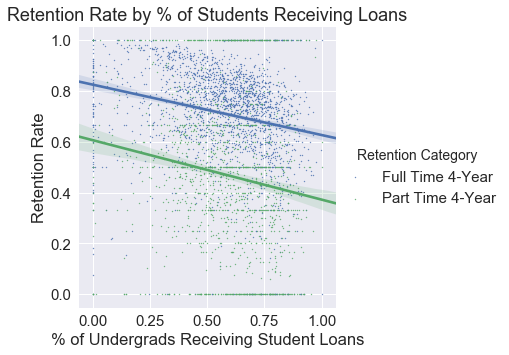

In [148]:
sns.lmplot('PCTFLOAN', # Horizontal axis
           'Retention Rate', # Vertical axis
           data=data1, # Data source
           fit_reg=True, # Don't fix a regression line
           hue="Retention Category", # Set color
           order = 1,
           scatter_kws={"marker": "D", # Set marker style
                        "s": 2}) # S marker size

# Set title
plt.title('Retention Rate by % of Students Receiving Loans')

# Set x-axis label
plt.xlabel('% of Undergrads Receiving Student Loans')

# Set y-axis label
plt.ylabel('Retention Rate')
plt.savefig('./images/figure6.png')
plt.show()

In [127]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
y_imputed = imputer.fit_transform(data1['Retention Rate'])
x_imputed = imputer.fit_transform(data1['PCTFLOAN'])


C:\Users\Samir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Samir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Samir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarn

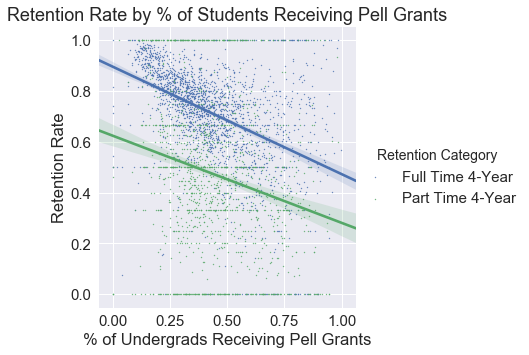

In [56]:
sns.lmplot('PCTPELL', # Horizontal axis
           'Retention Rate', # Vertical axis
           data=data1, # Data source
           fit_reg=True, # Don't fix a regression line
           hue="Retention Category", # Set color
           order = 1,
           scatter_kws={"marker": "D", # Set marker style
                        "s": 2}) # S marker size

# Set title
plt.title('Retention Rate by % of Students Receiving Pell Grants')

# Set x-axis label
plt.xlabel('% of Undergrads Receiving Pell Grants')

# Set y-axis label
plt.ylabel('Retention Rate')
plt.savefig('./images/figure7.png')
plt.show()

As a supplement to the plots and to properly assess the Pearson correlations by Retention Category (Full-Time 4-Year and Part-Time 4-Year), we will re-calculate the values:

In [176]:
c = data1.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")
corrmat = pd.DataFrame(so, columns = ['corr'], index=None)
corr_rr = corrmat.loc['Retention Rate'].sort_values(by = 'corr', ascending = False)

In [179]:
#Pearson correlation in respect to Loan offerings of the instiution
corr_rr.loc['PCTFLOAN']

corr   -0.195991
Name: PCTFLOAN, dtype: float64

In [180]:
#Pearson correlation in respect to Pell Grant offerings of the instiution
corr_rr.loc['PCTPELL']

corr   -0.38473
Name: PCTPELL, dtype: float64

#### Findings

Looking at the relationship between retention rate and the percentage of students at an institution receiving loans, we see what may be a slightly negative correlation between the two variables, which would suggest retention rate decreases with an increasing percentage of student loan distribution at an institution. And when assessing the relationship between retention rates and Pell Grants, we see a stronger negative relationship, where an institution making a high percentage of offerings is likely to see lower retention.  

Both of these results would be in contrast to the hypothesis which respectively suggested that increased aid of both types at institutions would mean a higher retention rate. While it can be rationalized that financial aid can improve an individual student's circumstance and their probability of persisting through school, this may different from the separate conclusion that if an institution has a generally high percentage of financial aid offerings (particularly Pell Grants), its overall retention rate will be lower.  This is an interesting result, that naturally brings up new research questions and hypotheses that deserve further evaluation/study.

### Discussion & Implications

The results of the research analysis presented a number of interesting takeaways in respect to the three hypotheses.  For Hypothesis H1, we see public and private non-profit institutions show very similar retention rates, even when broken down by higher degree offerings and full-time/part-time student status.  The issue of student retention from a macroscopic perspective, seems to be less affected by the institution type, than it is by student status, where part-time students see lower retention. 

Also, we  happened to see that private for-profit institutions experience the lowest retention rates, regardless of breakdown.  These institutions are commonly under government scrutiny for performance given their reliance of federal funds [6].  An important question for policyholders remains: how much future funding should be allocated to these private for-profit institutions?  Along with lower retention rates, the Brooking Institution noted concerns about a lack of interest from the private sector in both employing graduates and investing in the institutions themselves.  This is especially troubling considering how these programs are marketed towards vocational training.

In the research results addressing the second hypothesis (H2), we see institutions see higher student retention rates if they their locales are urbanized and population-dense.  Leveraging the dynamics of these findings may be helpful to students/families when deciding the best option for a student who has the options of considering between locales while considering their own preferences.  If a student has a concern about being "home-sick" or grew up in a more urbanized environment, this could be a helpful consideration.  And on the other end, students from more rural areas may present themselves with great economic opportunities by looking at locales in more urbanized areas.

In the final part of the research, we evaluate the effect of financial aid tools on retention rates, specifically student loans and Pell Grants.  Both plots of retention rate and the percentage of undergraduates with Grants and Loans (respectively) showed a negative correlation which would suggest institutions offering more financial aid tools are likely to see a lower overall retention rate.  However, given the undeniable financial benefit of aid tools in helping students with the opportunity to attend college in the first place, these results show the complexity of the issue.  Overall, the topic of retention rate and financial aid requires further study to validate results and additional breakdown. 


### Limitations

There are several limitations in this research analysis that should be noted, including the sparsity of the College Scorecard data set, the lack of a model or algorithm to make efficient use of the large data set, and the high-level nature of the research questions.

Beginning with the data set, the sparsity makes it difficult to exploit the potential granularity that the feature space would otherwise allow if all of the data existed.  Many columns are entirely empty and limit the ability to break down certain variables for a more detailed analysis (e.g. looking at specific withdrawal rates by institution type, transfer rates, retention by income bracket and demographic, etc.). 

Also, with the heavy set of categorical features, decoding meanings of values (through use of the Data Dictionary) is a task that requires more scope beyond the bandwidth of this particular research project.  Imputing the categorical data to assess the sparsity to make the data set usable for any machine learning was also beyond the scope of this project.  But in fairness, this would not be the appropriate first step anyhow as there remains plenty to explore with the data in its current state.

Lastly, the research questions posed only provided high-level understanding of factors that affect retention rates for 4-year undergraduate programs.  However, to properly utilize the data for the benefit of students nationwide, a more in-depth analysis targeting specific students and their conditions would be the logical next step.  Due to bandwidth limitations, the research did not extend itself that far, but there is some foundation laid to follow-up with further research analysis in the future.

### Conclusion

Overall, we saw in the research that institutions offering 4-year undergraduate degrees show retention rates are highest for students attending full-time, in either public or private non-profit institutions, and which located in more urbanized areas. We see when assessing financial aid that the results showed a negative correlation between an institution's overall retention rate and financial aid offerings (both loans and grants respectively).  However, due to the complexity of financial aid distributions, their varying individual impact on a student and the effect on an institution that has a student base that is primarily financial dependent, there remains a lot more analysis required to further understand the dynamics that financial aid tools play in retention rate.

In this study, we see that while the College Scorecard data set does have a considerable amount of potential, much of the data is sparse (nearly 75% null values as assessed earlier). Modeling with the entire feature space is not possible and imputation immediately poses itself as a challenge as well (particularly with so many categorical variables).  However, there remains a lot of potential given the entire breadth of the data set (recalling that it spans back to the 1996 academic year) in terms of data analysis and even modeling.  

To leverage the data in a modeling algorithm, applying machine learning regression techniques would be an interesting future step. Developing a model which allows for inference would be recommended to learn about other impactful features in the data set. Methods such as LASSO regression could clearly help identify obscure parameters affecting success metrics such as retention rate.

The results of this research does help confirm to an extent that the best college options are not only evaluated on success metrics provided by popular publications (such as U.S. News and World Report).  Evaluation of options for a student and families requires more consideration of nuance, considering factors that could be important to a specific student and their family circumstance in respect to demographics, income levels, locale proximity in relation to home, etc.

With the likely need for analyses tailored to the varying circumstances of each student, the space of academic advising and counseling could leverage of this Scorecard data set and use analytical approaches for helping supplement the decision process for students.  When recommending universities/programs, high school counselors currently rely on conveying details of basic admissions requirements, but could further help inform students of conditions affecting their success with an analytical approach that looks that encompasses several indicators.  This would require a shift in the approach and training skill set for counselors but could be entirely worthwhile for government to subsidize if outcomes are beneficial and efficiencies in funding towards higher education are ultimately increased.


### References

[1] What are graduation, retention and transfer rates?. (n.d.). Retrieved December 10, 2017, from https://fafsa.ed.gov/help/fotw91n.htm

[2] Hossler, D., Ziskin, M., Gross, J. P., Kim, S., & Cekic, O. (2009). Student Aid and Its Role in Encouraging Persistence. Higher Education: Handbook of Theory and Research, 389-425. doi:10.1007/978-1-4020-9628-0_10


[3] Leonhardt, D. (2015, September 16). California’s Upward-Mobility Machine. Retrieved November 07, 2017, from https://www.nytimes.com/2015/09/17/upshot/californias-university-system-an-upward-mobility-machine.html?_r=1


[4] Physical campus qualities 'impact retention and graduation'. (2017, February 16). Retrieved December 10, 2017, from https://www.timeshighereducation.com/news/physical-campus-qualities-impact-retention-and-graduation


[5] College Scorecard Data Documentation. (n.d.). Retrieved November 09, 2017, from https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf

[6] Kelchen, R. (2017, January 10). How much do for-profit colleges rely on federal funds? Retrieved December 10, 2017, from https://www.brookings.edu/blog/brown-center-chalkboard/2017/01/11/how-much-do-for-profit-colleges-rely-on-federal-funds/